<a href="https://colab.research.google.com/github/rahhul/GANs/blob/master/GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GANs

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
# imports

import sys
assert sys.version_info >= (3, 5)

# Scikit Learn
import sklearn
assert sklearn.__version__ >= "0.20"

import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Check GPU availaility
physical_devices = tf.config.list_logical_devices('GPU')
print("Num Devices: ", len(physical_devices))

# common imports
import numpy as np
import os

# set random seeds
np.random.seed(42)
tf.random.set_seed(42)

import matplotlib.pyplot as plt

Num Devices:  0


## PCA with a Linear Autoencoder

Synthetic 3D Dataset

In [0]:
# utility function to plot images

def plot_image(image):
    plt.imshow(image, cmap='binary')
    plt.axis('off')

In [0]:
# helper function to create 3D dataset

np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

In [0]:
X_train = generate_3d_data(60)
X_train.shape

(60, 3)

In [0]:
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [0]:
from mpl_toolkits import mplot3d

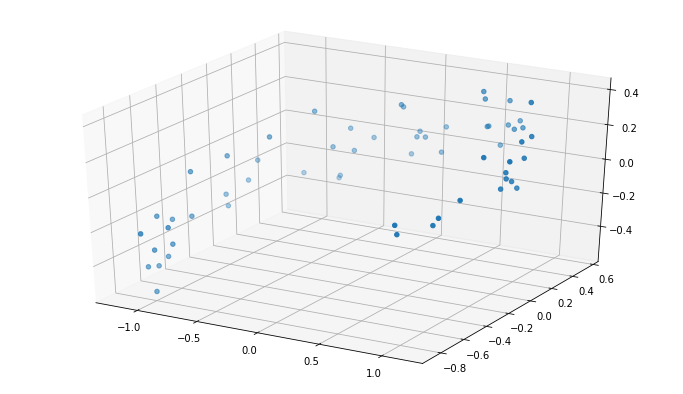

In [0]:
fig = plt.figure(figsize=(12, 7))
ax = plt.axes(projection='3d')

ax.scatter3D(X_train[:, 0], X_train[:, 1], X_train[:, 2])

## Simple Autoencoder

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

encoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, input_shape=[3])
])

decoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(3, input_shape=[2])
])

autoencoder = tf.keras.Sequential([
                encoder, decoder
])

autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 2)                 8         
_________________________________________________________________
sequential_1 (Sequential)    (None, 3)                 9         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [0]:
# compile model

optimizer = tf.keras.optimizers.SGD(learning_rate=1.5)

autoencoder.compile(loss='mse', optimizer=optimizer)

In [0]:
history = autoencoder.fit(X_train, X_train, epochs=20)

Train on 60 samples
Epoch 1/20
60/60 [==============================] - 0s 3ms/sample - loss: 0.3064
Epoch 2/20
60/60 [==============================] - 0s 153us/sample - loss: 0.3797
Epoch 3/20
60/60 [==============================] - 0s 85us/sample - loss: 0.1454
Epoch 4/20
60/60 [==============================] - 0s 92us/sample - loss: 0.0872
Epoch 5/20
60/60 [==============================] - 0s 121us/sample - loss: 0.0658
Epoch 6/20
60/60 [==============================] - 0s 98us/sample - loss: 0.0464
Epoch 7/20
60/60 [==============================] - 0s 97us/sample - loss: 0.0356
Epoch 8/20
60/60 [==============================] - 0s 108us/sample - loss: 0.0238
Epoch 9/20
60/60 [==============================] - 0s 103us/sample - loss: 0.0225
Epoch 10/20
60/60 [==============================] - 0s 93us/sample - loss: 0.0093
Epoch 11/20
60/60 [==============================] - 0s 106us/sample - loss: 0.0068
Epoch 12/20
60/60 [==============================] - 0s 99us/sample - lo

In [0]:
codings = encoder.predict(X_train)
codings.shape

(60, 2)

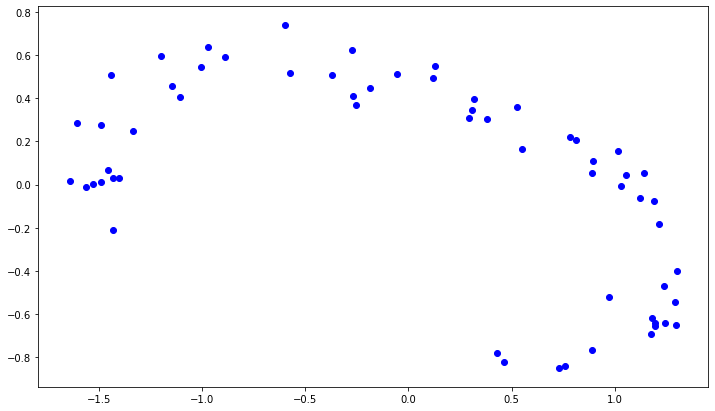

In [0]:
# plot codings
plt.figure(figsize=(12, 7))
plt.scatter(codings[:, 0], codings[:, 1], marker='o', c='b')

## Stacked Autoencoders